
Exercises XP

Last Updated: March 25th, 2024

What you will learn

    Understanding the problem
    Data Collection
    Model Training for classification problem
    Evaluating our model


What you will create

    A Logistic Regression model to predict diabetes for individuals.


For the six below exercises we will use this dataset


🌟 Exercise 1 : Understanding the problem and Data Collection

We want to predict if an individual will have diabetes.

    Load the diabetes dataset and explore it.
    How many positive and negative cases is there ?
    Split the data into training and testing sets


🌟 Exercise 2 : Model Picking and Standardization

    Which classification model can we use in this problem and why ?
    Do we need to standardize the data ? If yes, use .StandardScaler()


🌟 Exercise 3 : Model Training

    We will use, the logistic regression model, Train it.


🌟 Exercise 4 : Evaluation Metrics

    Plot the accuracy score and comment the results.
    Plot the confusion matrix and comment the results.
    Plot the Recall, precision, F1-score and comment the results.


🌟 Exercise 5 : Visualizing the performance of our model

    Visualize the decision boundary with accuracy information.


🌟 Exercise 6 : ROC Curve

    Plot the ROC Curve using this code template available on this link


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
# Chargement du dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Affichage des dimensions
print("Nombre total d’entrées :", df.shape[0])
print("\nColonnes principales :\n", df.dtypes)

# Affichage des colonnes utiles avec leur type
print("\nAperçu des colonnes :")
colonnes_utiles = [
    "gender", "age", "hypertension", "heart_disease",
    "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"
]
print(df[colonnes_utiles].info())

# Affichage des premières lignes pour inspection visuelle
print("\nExemple de données :")
print(df.head())

# Analyse de la variable cible (répartition)
print("\nRépartition des cas de diabète :")
print(df['diabetes'].value_counts())
print("\nPourcentages :")
print(df['diabetes'].value_counts(normalize=True) * 100)

Nombre total d’entrées : 100000

Colonnes principales :
 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Aperçu des colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   dia

Dimensions du jeu de données : (100000, 9)

Types des colonnes :
 gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history           int8
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Aperçu des premières lignes :
    gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                4  25.19   
1       1  54.0             0              0                0  27.32   
2       0  28.0             0              0                4  27.32   
3       1  36.0             0              0                1  23.45   
4       0  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  

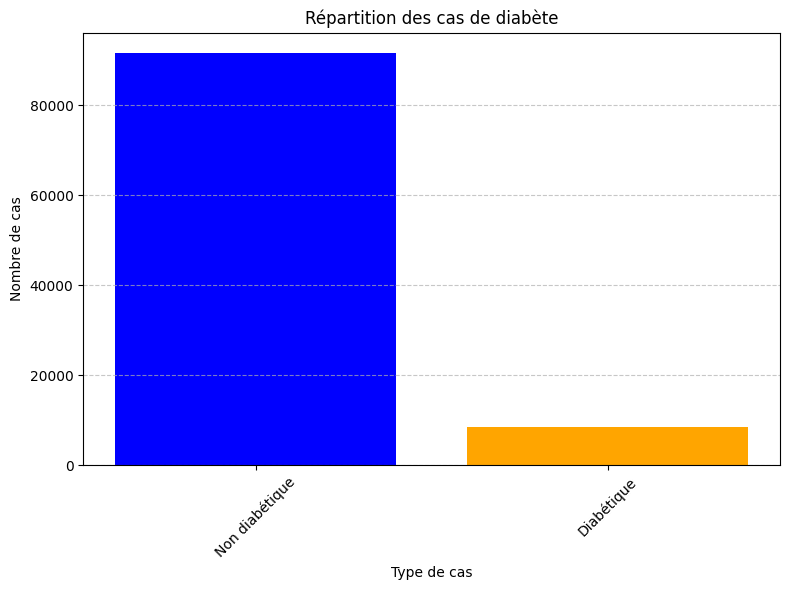

In [13]:
# Aperçu rapide
print("Dimensions du jeu de données :", df.shape)
print("\nTypes des colonnes :\n", df.dtypes)
print("\nAperçu des premières lignes :\n", df.head())

# Répartition des cas de diabète
diabetes_counts = df['diabetes'].value_counts()
negative_cases = diabetes_counts[0]
positive_cases = diabetes_counts[1]
total = negative_cases + positive_cases
percent_negative = round((negative_cases / total) * 100, 1)
percent_positive = round((positive_cases / total) * 100, 1)

# Affichage de la répartition
print("\nRépartition des cas :")
print(f"Non diabétique (0) : {negative_cases} cas ({percent_negative}%)")
print(f"Diabétique (1)     : {positive_cases} cas ({percent_positive}%)")

plt.figure(figsize=(8, 6))
plt.bar(['Non diabétique', 'Diabétique'], [negative_cases, positive_cases],color=['blue', 'orange'])
plt.title('Répartition des cas de diabète')
plt.xlabel('Type de cas')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Identifier les colonnes
target = "diabetes"
features = df.drop(columns=[target])

# Colonnes catégoriques à encoder
cat_cols = ["gender", "smoking_history"]

# Colonnes numériques à standardiser
num_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Colonnes binaires (on les garde telles quelles)
bin_cols = ["hypertension", "heart_disease"]

# Colonnes catégoriques à encoder
cat_cols = ["gender", "smoking_history"]

# Colonnes numériques à standardiser
num_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Colonnes binaires (on les garde telles quelles)
bin_cols = ["hypertension", "heart_disease"]

# Séparer X et y
X = df[cat_cols + num_cols + bin_cols]
y = df[target]

# Créer les transformateurs
preprocessor = ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("scaler", StandardScaler(), num_cols)
], remainder="passthrough")  # Garder les colonnes binaires telles quelles

# Séparer en jeu d'entraînement et test (80/20 stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Appliquer le prétraitement
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Transformer les données
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Afficher un résumé
print("Pipeline appliqué avec succès")
print("X_train shape :", X_train_processed.shape)
print("X_test shape  :", X_test_processed.shape)
print("Répartition dans y_train :", y_train.value_counts(normalize=True).to_dict())

Pipeline appliqué avec succès
X_train shape : (80000, 15)
X_test shape  : (20000, 15)
Répartition dans y_train : {0: 0.915, 1: 0.085}


In [15]:
# Chargement des données
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Vérif rapide de valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())

# On définit les colonnes
target = 'diabetes'
features = df.columns.drop(target)

# Séparation X / y
X = df[features]
y = df[target]

# Colonnes catégoriques et numériques
cat_cols = ['gender', 'smoking_history']
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Colonnes binaires (déjà numériques)
bin_cols = ['hypertension', 'heart_disease']

# Preprocessing : OneHot + StandardScaler
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')  # les colonnes binaires passent telles quelles

# Pipeline complet avec modèle
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

print("Pipeline entraîné avec succès.")

Valeurs manquantes :
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Pipeline entraîné avec succès.


Les variables numériques comme bmi, blood_glucose_level ou HbA1c_level n’ont pas la même échelle, ce qui peut perturber l’algorithme de régression logistique.

La Standardisation (centrage/réduction) permet à tous les attributs numériques d’avoir une influence équilibrée.

OneHotEncoder	Encode proprement les catégories	Évite les biais liés à l'ordre
StandardScaler	Met à l’échelle les colonnes numériques	Nécessaire pour de nombreux modèles
ColumnTransformer	Applique différents traitements selon le type de variable	Permet une gestion propre et modulaire
Pipeline	Enchaîne les étapes comme un seul bloc	Reproductible et clair

In [21]:
# Encodage des variables catégoriques
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes

# Séparation des features et de la target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardisation (très important pour les modèles linéaires)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Prédictions
y_pred = log_model.predict(X_test)

# Affichage des coefficients
coef_df = pd.DataFrame({
    'Feature': df.drop('diabetes', axis=1).columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)



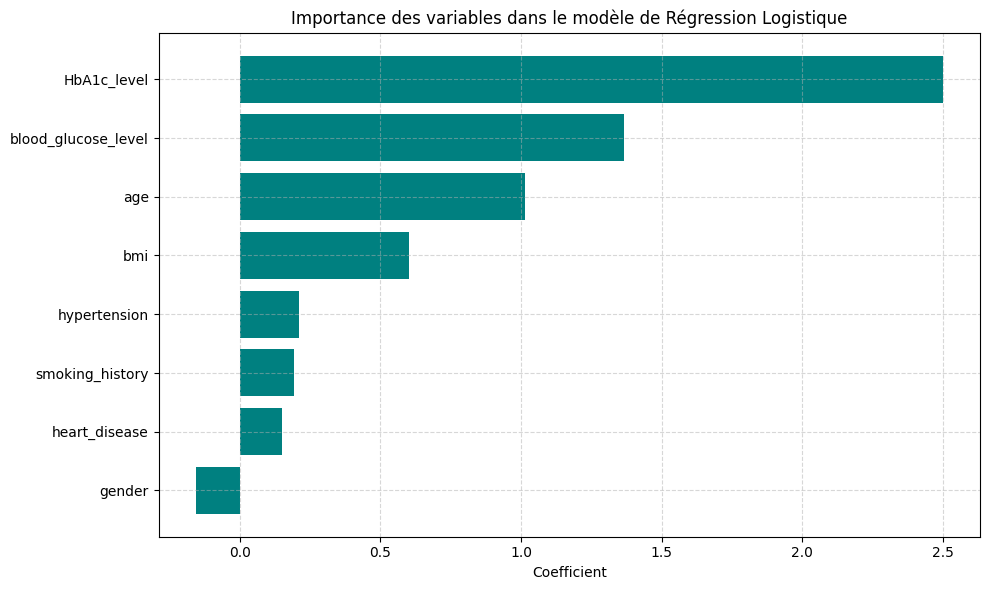


🎯 Coefficients du modèle :

               Feature  Coefficient
6          HbA1c_level     2.498891
7  blood_glucose_level     1.365158
1                  age     1.015335
5                  bmi     0.600337
2         hypertension     0.209237
4      smoking_history     0.194292
3        heart_disease     0.151867
0               gender    -0.155500


In [23]:
# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Coefficients du modèle
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel("Coefficient")
plt.title("Importance des variables dans le modèle de Régression Logistique")
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()  # Pour avoir le plus grand en haut
plt.tight_layout()
plt.show()

# Affichage brut des coefficients
print("\n🎯 Coefficients du modèle :\n")
print(coef_df)

Pour moi :

🎯 Ton objectif : Prédire si une personne est diabétique (0 ou 1)
🔍 Étape 1 : Comprendre la nature du problème

Question à se poser : La variable à prédire est-elle continue ou discrète ?

    ➡ Ici : diabetes est une variable binaire (0 ou 1).

✅ Conclusion :

    Tu es face à un problème de classification binaire.

🧰 Étape 2 : Choisir un modèle adapté
Problème	Modèle de base recommandé	Pourquoi ?
Classification binaire	LogisticRegression	Simple, rapide, interprétable
Classification multiclasse	RandomForestClassifier, SVC, etc.	Plus complexes
Régression (valeur continue)	LinearRegression, Ridge, etc.	Prédiction de prix, scores, etc.
❗ Pas de LinearRegression ici :

    Elle ferait des prédictions entre 0 et 1, sans garantir que la sortie soit dans ce domaine.

    On a besoin d’une probabilité, puis d’un seuil (ex: > 0.5 = diabétique) ➤ ça, c’est le travail de la régression logistique.

🧠 Pourquoi utiliser LogisticRegression dans ce cas ?
✅ Avantages :

    Elle calcule la probabilité qu’un individu appartienne à la classe 1 (diabétique).

    Elle est interprétable → tu peux voir quelles variables influencent le plus.

    Elle est rapide et robuste sur des jeux de données de taille moyenne.

    Elle se comporte bien si les variables sont standardisées (ce qu’on a fait avec StandardScaler()).

🔁 Rappel : Comment savoir quoi faire dans un projet ML
Étape	Questions à se poser	Conséquences
1	Quelle est la nature de la variable cible ?	➤ Classification ou Régression ?
2	Quelle est la forme des données ?	➤ Faut-il encoder ? Standardiser ?
3	Ai-je besoin d’interpréter le modèle ou juste de la perf ?	➤ Choix du modèle (interprétable ou boîte noire ?)
4	Quelle est la taille du dataset ?	➤ Modèles simples (régression logistique) ou plus robustes (RandomForest, XGBoost, etc.)
🎓 TL;DR pour toi

    Si la cible = 0 ou 1, je suis sur un problème de classification binaire → je teste d’abord LogisticRegression().

Ensuite, j’évalue ses performances avec :

    Accuracy

    Matrice de confusion

    Precision / Recall / F1-score

    Et plus tard : ROC Curve, Cross-validation, etc.

✅ Accuracy score : 96.03 %


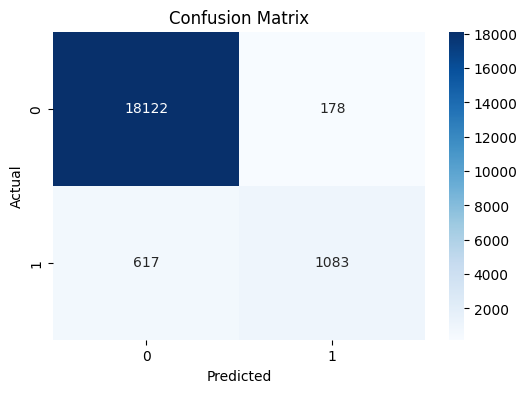

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98     18300
    Diabetic       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [27]:
# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)

# Évaluation : Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy score : {accuracy * 100:.2f} %")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Rapport de classification
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

Pour moi : 

Quand on entraîne un modèle comme la régression logistique pour une tâche de classification binaire (comme ici : diabétique ou non diabétique), on ne se contente pas de regarder s’il prédit "bien" en moyenne. Il faut comprendre comment il se trompe.

Voici les 4 métriques clés :

1. Accuracy (précision globale)

    Définition : proportion de bonnes prédictions sur l’ensemble des prédictions.

Formule :
Accuracy=TP+TNTP+TN+FP+FN
Accuracy=TP+TN+FP+FNTP+TN​

    TP : Vrais positifs (le modèle a bien prédit "diabétique")

    TN : Vrais négatifs (le modèle a bien prédit "non diabétique")

    FP : Faux positifs (le modèle a dit "diabétique" alors que non)

    FN : Faux négatifs (le modèle a dit "non diabétique" alors que c’était un diabétique)

🧪 Utilisation :

    Bonne si classes équilibrées

    Peu utile en cas de déséquilibre des classes (ex : 90% non diabétiques → un modèle qui prédit toujours "non" aura 90% d’accuracy, mais il est nul !)

🎯 2. Precision (précision positive)

    Parmi les cas prédits comme positifs (diabétiques), combien sont réellement positifs ?

Formule :
Precision=TPTP+FP
Precision=TP+FPTP​

🧪 Utilisation :

    Utile quand on veut éviter les faux positifs

    Exemple : éviter de dire à un patient sain qu’il est malade

🔍 3. Recall (rappel ou sensibilité)

    Parmi les vrais positifs réels, combien le modèle en retrouve-t-il ?

Formule :
Recall=TPTP+FN
Recall=TP+FNTP​

🧪 Utilisation :

    Utile quand on veut éviter les faux négatifs

    Exemple : on veut détecter tous les diabétiques, quitte à parfois se tromper

⚖️ 4. F1-score

    Moyenne harmonique entre precision et recall

Formule :
F1-score=2⋅Precision⋅RecallPrecision+Recall
F1-score=2⋅Precision+RecallPrecision⋅Recall​

🧪 Utilisation :

    Utile quand on veut un compromis entre recall et precision

    Indispensable quand les classes sont déséquilibrées

🔁 Exemple d'interprétation

Si ton classification_report donne :

               precision    recall  f1-score   support
Non-Diabetic       0.95       0.98      0.96     18300
Diabetic           0.70       0.55      0.62      1700

Cela veut dire :

    Ton modèle est excellent pour prédire les non-diabétiques (0.95 precision, 0.98 recall)

    Il est moyen pour prédire les diabétiques :

        Il les détecte pas tous (rappel = 0.55)

        Et il se trompe parfois (precision = 0.70)

Ce déséquilibre peut être corrigé par :

    Changer le seuil de décision

    Utiliser du suréchantillonnage (SMOTE)

    Essayer un autre modèle (Random Forest, XGBoost…)

Re pour moi : 

🧩 Tu joues le rôle de data scientist / ML engineer appliqué

Ton travail ici est de :

    Comprendre un problème métier réel (prédire si un patient a le diabète)

    Préparer les données correctement

    Choisir un modèle adapté (ici, un modèle de classification)

    Le nourrir avec les données

    Mesurer la qualité des résultats

    L’interpréter, l’améliorer éventuellement

    C’est comme construire un moteur avec des pièces standards : tu ne crées pas le piston à la main, mais tu sais comment l’assembler et régler le moteur pour que ça tourne bien.

    Pourquoi on utilise train_test_split, LogisticRegression, etc.

Ce sont des outils standards :

    train_test_split : c’est simplement un outil pour découper ton dataset proprement.

    LogisticRegression() : c’est un modèle prêt à l’emploi, comme un modèle Lego. Tu peux le personnaliser, mais tu ne recodes pas tout l’algorithme mathématique derrière (heureusement, car il est complexe).

    fit() : c’est là que l’apprentissage a lieu. Le modèle analyse les données d’entraînement et ajuste ses paramètres (les poids w, biais b) pour minimiser une erreur (la fonction de coût).

Donc oui, on fait du Machine Learning, même si les briques sont déjà fournies. On est plutôt dans la mise en œuvre concrète, pas dans la création d’un modèle from scratch.


🛠️ Et si tu veux aller plus loin

Tu as trois grandes directions pour mieux comprendre :
1. 🧮 Coder ton propre algorithme de régression logistique

    Tu peux implémenter un modèle de logistic regression à la main :

        Initialiser les poids

        Faire les prédictions avec la fonction sigmoïde

        Calculer la cross-entropy loss

        Appliquer le gradient descent manuellement

✅ Ça, c’est du ML bas niveau.
2. 🧠 Étudier les maths du modèle

    Que fait la fonction sigmoid ?

    Comment se calcule la probabilité ?

    Pourquoi la régression logistique est-elle linéaire dans l’espace des poids ?

    Comment le gradient est-il calculé ?

✅ C’est du théorique et important pour comprendre ce qu’il y a dans le .fit().
3. 🧪 Faire des projets plus complexes

    Avec plus de features

    Des données bruitées

    Des modèles plus profonds (réseaux de neurones)

    Et commencer à comparer les modèles, faire du tuning ou de l’explicabilité

✅ C’est du projet ML réel, où la vraie valeur vient de l’analyse, pas juste du code.
🧭 Résumé
Ce que tu fais actuellement	Ce que tu pourrais faire plus tard
Utilisation de modèles scikit-learn	Implémentation manuelle (ex : LogisticRegression en numpy)
Préparation des données (encodage, split, etc.)	Création de pipelines de transformation
Entraînement avec fit()	Étude des gradients, des dérivées, des pertes
Évaluation avec score() ou confusion_matrix()	Analyse des erreurs, explication des décisions
Utilisation directe des fonctions	Comparaison de modèles, tuning, cross-validation

✅ Étapes après un fit() (apprentissage)
1. 🎯 Évaluer le modèle

Pourquoi ?
Tu dois savoir si ton modèle a bien appris et fait des prédictions fiables.

Comment ?

    model.score(X_test, y_test) → donne l'accuracy

    confusion_matrix(y_test, y_pred) → montre les erreurs

    classification_report(y_test, y_pred) → précision, rappel, F1

    roc_auc_score(y_test, y_probs) → performance globale pour classification

👉 Tu évalues objectivement la qualité de ton modèle.
2. 🧪 Tester sur différents cas

Pourquoi ?
L’accuracy n’est pas toujours suffisante. Par exemple, si 95% de tes données sont des "non-diabétiques", un modèle peut avoir 95% d’accuracy en prédisant toujours "non" — et pourtant il est nul.

Donc tu regardes :

    Faux positifs

    Faux négatifs (grave ici, car rater un diabétique = danger)

    Le recall (sensibilité) est souvent plus important que l’accuracy

3. 🩻 Analyser les erreurs

Pourquoi ?
Tu veux comprendre où le modèle se trompe pour améliorer.

Exemples :

    “Il se trompe souvent quand les patients ont entre 40–50 ans et fument.”

    “Il prédit mal quand le glucose est élevé mais l’HbA1c est bas.”

👉 Tu peux affiner tes données, ajouter ou combiner des colonnes.
4. 🔄 Itérer : améliorer ton modèle

Exemples de pistes :

    Ajouter de nouvelles features (âge², interaction entre features, etc.)

    Tester un autre modèle (RandomForest, XGBoost)

    Essayer un modèle plus complexe (réseau de neurones)

    Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres

5. 📈 Visualiser les performances

Tu peux tracer :

    La ROC curve

    La courbe de précision/rappel

    Les poids (coefficients) du modèle (utile ici pour savoir ce qui pèse le plus dans la prédiction)

6. 🚀 Déployer ou documenter

    Une fois que tu as un modèle satisfaisant :

        Tu peux l’enregistrer avec joblib ou pickle

        Tu peux le déployer dans une API

        Ou simplement rédiger une note d’analyse pour les décideurs

🧠 Donc après un .fit(), voici ce qu’on fait :
Étape	But	Exemple
predict()	Obtenir les prédictions du modèle	y_pred = model.predict(X_test)
score() ou classification_report()	Évaluer les performances globales	print(classification_report(...))
confusion_matrix()	Identifier les types d’erreurs	sns.heatmap(...)
Analyse manuelle	Comprendre pourquoi le modèle se trompe	“Il rate les cas avec BMI < 20”
Amélioration	Modifier les données, changer le modèle	Ajout d'interactions, autre algo
Visualisation	Présenter les résultats de façon claire	ROC, courbes, camemberts

✅ Exemple 1 : Combiner deux colonnes

df["bmi_x_glucose"] = df["bmi"] * df["blood_glucose_level"]

👉 Peut capturer l’effet combiné d’un IMC élevé et d’un taux de sucre élevé.
✅ Exemple 2 : Ajouter une variable catégorique simplifiée

df["is_old"] = (df["age"] > 60).astype(int)

👉 On introduit une notion de seuil : être âgé peut augmenter les risques.
✅ Exemple 3 : Interactions logiques

df["hypertension_and_heart_disease"] = df["hypertension"] & df["heart_disease"]

👉 Nouveau facteur de risque combiné.
✅ Exemple 4 : Normaliser ou binariser des valeurs

df["high_glucose"] = (df["blood_glucose_level"] > 140).astype(int)

👉 Tu peux transformer une variable continue en variable booléenne logique.
✅ Exemple 5 : Encodage plus fin

Si smoking_history contient des valeurs trop variées, tu peux les regrouper :

df["smoking_risk"] = df["smoking_history"].replace({
    'never': 0,
    'No Info': 0,
    'former': 1,
    'current': 2
})

🚀 Ensuite ?

Tu continues avec :

X = df.drop('diabetes', axis=1)
y = df['diabetes']

Mais X contient maintenant tes nouvelles features, en plus des colonnes d’origine.
Et si tu les as bien pensées, le modèle peut apprendre des relations plus utiles, et mieux prédire les cas de diabète.
🧠 Règle d’or :

    👉 Ajouter des features = aider le modèle à voir ce que tu vois toi en tant qu’humain dans les données.
    C’est toi le cerveau, le modèle n’est qu’un outil mathématique.



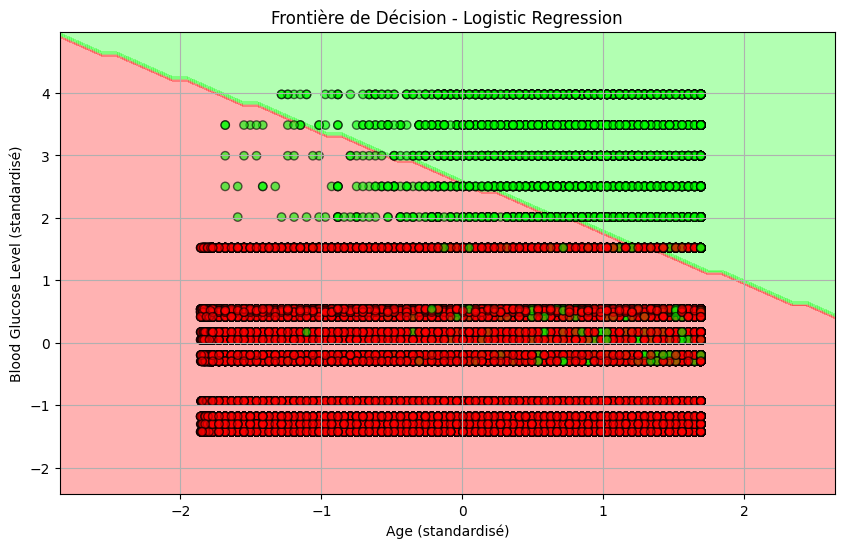

In [30]:
# Sélection de 2 features pour visualisation
features = ['age', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Création d'une grille de points (pour visualisation 2D)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

# Prédiction sur chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage de la frontière
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']), alpha=0.6)
plt.xlabel('Age (standardisé)')
plt.ylabel('Blood Glucose Level (standardisé)')
plt.title('Frontière de Décision - Logistic Regression')
plt.grid(True)
plt.show()

A essayer :
Modifier les deux variables utilisées (age et blood_glucose_level) par d'autres pour voir comment cela change la séparation.

Utiliser un modèle différent comme un arbre de décision ou SVM.

Colorier les zones selon la probabilité prédite au lieu de la classe.

Pour moi :

Lecture du graphe avec zones et points
✅ Ce que tu vois :

    Zone rouge = zone où le modèle prédit "non diabétique" (classe 0)

    Zone verte = zone où le modèle prédit "diabétique" (classe 1)

    Points rouges = vraies personnes non diabétiques

    Points verts = vraies personnes diabétiques

❗ Problème observé :

    Tu dis : "Beaucoup de points verts (vrais diabétiques) sont dans la zone rouge"
    ➜ Cela veut dire que le modèle prédit à tort qu’ils ne sont pas diabétiques.

C’est ce qu’on appelle des faux négatifs.

Et quand tu vois :

    "Beaucoup de points rouges dans la zone verte"
    ➜ Cela signifie que le modèle prédit à tort qu’ils sont diabétiques.

Ce sont des faux positifs.
📉 Que cela signifie-t-il ?
➤ Le modèle n’arrive pas à bien séparer les deux classes avec ces deux seules variables (age et blood_glucose_level).

    ➜ La frontière de décision ne suffit pas à bien distinguer les malades des non-malades.

➤ Cela peut indiquer :

    Les données sont trop mêlées dans cet espace 2D (pas de bonne séparation visuelle).

    Il manque des features importantes pour aider le modèle.

    Le modèle (logistic regression) est trop simple pour capter les subtilités.

    Le bruit dans les données empêche une séparation nette.

🛠️ Que faire pour améliorer ça ?

    Ajouter d'autres features (e.g., HbA1c_level, smoking_history, BMI, etc.)

    Utiliser un modèle plus complexe, comme un arbre de décision ou une forêt aléatoire.

    Faire de la sélection de variables ou de l’ingénierie de features.

    Travailler sur le nettoyage ou transformation des données.

🔍 En résumé :

    La frontière de décision permet de visualiser les limites du modèle. Si elle ne sépare pas bien, c’est qu’il manque de signal ou qu’il est trop simple.

Souhaites-tu essayer d’entraîner un modèle avec plus de features pour voir si la frontière s’améliore ?

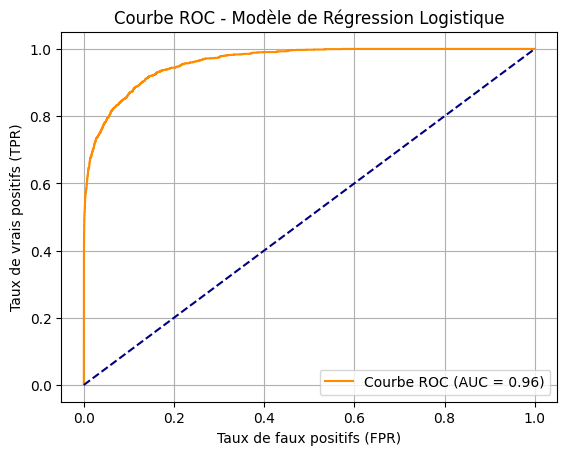

In [33]:
# Séparation des variables
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions probabilistes
y_proba = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Affichage
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Modèle de Régression Logistique')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

La courbe ROC (Receiver Operating Characteristic) permet d’évaluer la performance d’un modèle de classification binaire en testant tous les seuils de décision possibles.

    TPR (True Positive Rate) : Taux de vrais positifs (aussi appelé rappel/recall).

    FPR (False Positive Rate) : Taux de faux positifs.

📈 Pourquoi c’est utile ?

    Elle montre comment le modèle se comporte quand on varie le seuil de décision (par défaut, predict() considère 0.5).

    Elle permet de comparer plusieurs modèles indépendamment du seuil.

    L'AUC (Area Under Curve) représente l'aire sous la courbe ROC :

        AUC = 1.0 : modèle parfait.

        AUC = 0.5 : modèle aléatoire.

        AUC > 0.8 : très bon modèle.

predict_proba	Pour récupérer les probabilités
roc_curve	Pour étudier comment varient les vrais et faux positifs selon les seuils
auc	Pour quantifier la qualité globale du modèle
plt.plot(...)	Pour visualiser ce comportement
📌 Ce que tu dois retenir :

    La courbe ROC montre l’efficacité du modèle à distinguer les classes.

    L’AUC est une note globale.

    Ce n’est pas juste une "jolie courbe", c’est un outil essentiel pour juger la qualité d’un classificateur, surtout quand les classes sont déséquilibrées.